## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [51]:
# Import Variables
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [45]:
# Read in the Data Set
data = pd.read_csv("cleaned_ecommerce_dataset.csv")
#Print out its Total Length
data.shape[0]

2685

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [24]:
data.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


There are 11 Columns. The datatypes are as follows:
- userId: int64
- timestamp: int64
- review: object
- item: object
- rating: float64
- helpfulness: float64
- gender: object
- category: object
- item_id: int64
- item_price: float64
- user_city: int64

In [48]:
# Correlations
data['gender'] = pd.factorize(data['gender'])[0]
data['category'] = pd.factorize(data['category'])[0]
correlation_data = data[['helpfulness', 'rating', 'gender', 'category']].corr(numeric_only=True)
print(correlation_data)

             helpfulness    rating    gender  category
helpfulness     1.000000 -0.007523 -0.075947  0.032015
rating         -0.007523  1.000000  0.034337  0.037364
gender         -0.075947  0.034337  1.000000 -0.002576
category        0.032015  0.037364 -0.002576  1.000000


# Analysis
## Rating vs Helpfulness
### Correlation: -0.007523
### Analysis
The correlation between the two is very close to zero. This suggests that there is almost no linear relationship between how helpful a review is and the actual rating given to that item. The helpfulness of a review doesn't appear to strongly influence the rating given by the user.
## Rating vs Gender
### Correlation: Males -0.034337; Females 0.034337
### Analysis
Both male and females have very weak correlations with the rating. This indicates there is no clear trend of certain genders tending to give higher or lower ratings. This is seen with the weak linear relationship between gender and rating.
## Rating vs Category:
### Correlation: 0.037364
### Analysis
Similarly to Gender, the correlation between category and rating is also very small, indicating a weak positive relationship. This suggests that the category of the item might have a slight influence on the rating, but it's not a strong predictor.
## Gender vs Helpfulness
### Correlation: -0.075947
### Analysis
This indicates a weak negative correlation. However, it's important to interpret this cautiously. It might suggest that there is a slight tendency for reviews written by one gender to be rated as less helpful by others, but the correlation is not strong enough to make definitive conclusions.
## Hypothesis
The correlation vales are generally quite low, suggesting that, individually, they might not be strong predictors of the Rating. A regression model using these features might not perform very well due to the weak correlations.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [50]:
train_data_case1, test_data_case1 = train_test_split(data, train_size=0.1, random_state=42)


# Case 1: Training data containing 10% of the entire data
train_data_case1, test_data_case1 = train_test_split(data, train_size=0.1, random_state=42)
print("Case 1:")
print("Training data shape:", train_data_case1.shape)
print("Testing data shape:", test_data_case1.shape)

# Case 2: Training data containing 90% of the entire data
train_data_case2, test_data_case2 = train_test_split(data, train_size=0.9, random_state=42)
print("\nCase 2:")
print("Training data shape:", train_data_case2.shape)
print("Testing data shape:", test_data_case2.shape)

Case 1:
Training data shape: (268, 11)
Testing data shape: (2417, 11)

Case 2:
Training data shape: (2416, 11)
Testing data shape: (269, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [55]:
# Select the most and least correlated features regarding rating
most_correlated_features = ['helpfulness', 'category']
least_correlated_features = ['gender', 'category']

# Define a function to train and evaluate a linear regression model
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# Model A: Case 1 - Most correlated features
X_train_model_a_case1 = train_data_case1[most_correlated_features].values
y_train_model_a_case1 = train_data_case1['rating'].values
X_test_model_a_case1 = test_data_case1[most_correlated_features].values
y_test_model_a_case1 = test_data_case1['rating'].values

# Model B: Case 1 - Least correlated features
X_train_model_b_case1 = train_data_case1[least_correlated_features].values
y_train_model_b_case1 = train_data_case1['rating'].values
X_test_model_b_case1 = test_data_case1[least_correlated_features].values
y_test_model_b_case1 = test_data_case1['rating'].values

# Model C: Case 2 - Most correlated features
X_train_model_c_case2 = train_data_case2[most_correlated_features].values
y_train_model_c_case2 = train_data_case2['rating'].values
X_test_model_c_case2 = test_data_case2[most_correlated_features].values
y_test_model_c_case2 = test_data_case2['rating'].values

# Model D: Case 2 - Least correlated features
X_train_model_d_case2 = train_data_case2[least_correlated_features].values
y_train_model_d_case2 = train_data_case2['rating'].values
X_test_model_d_case2 = test_data_case2[least_correlated_features].values
y_test_model_d_case2 = test_data_case2['rating'].values

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [57]:
mse_model_a_case1 = train_and_evaluate_model(X_train_model_a_case1, y_train_model_a_case1, X_test_model_a_case1, y_test_model_a_case1)
mse_model_b_case1 = train_and_evaluate_model(X_train_model_b_case1, y_train_model_b_case1, X_test_model_b_case1, y_test_model_b_case1)
mse_model_c_case2 = train_and_evaluate_model(X_train_model_c_case2, y_train_model_c_case2, X_test_model_c_case2, y_test_model_c_case2)
mse_model_d_case2 = train_and_evaluate_model(X_train_model_d_case2, y_train_model_d_case2, X_test_model_d_case2, y_test_model_d_case2)

def calculate_rmse(mse):
    return np.sqrt(mse)

rmse_model_a_case1 = calculate_rmse(mse_model_a_case1)
rmse_model_b_case1 = calculate_rmse(mse_model_b_case1)
rmse_model_c_case2 = calculate_rmse(mse_model_c_case2)
rmse_model_d_case2 = calculate_rmse(mse_model_d_case2)

# Print the results
print("Model A (Case 1) - MSE:", mse_model_a_case1, "RMSE:", rmse_model_a_case1)
print("Model B (Case 1) - MSE:", mse_model_b_case1, "RMSE:", rmse_model_b_case1)
print("Model C (Case 2) - MSE:", mse_model_c_case2, "RMSE:", rmse_model_c_case2)
print("Model D (Case 2) - MSE:", mse_model_d_case2, "RMSE:", rmse_model_d_case2)

Model A (Case 1) - MSE: 1.8345515207639367 RMSE: 1.354456171592103
Model B (Case 1) - MSE: 1.8697898442987213 RMSE: 1.3674025904241667
Model C (Case 2) - MSE: 1.7190979760291663 RMSE: 1.3111437663464545
Model D (Case 2) - MSE: 1.7216496666271401 RMSE: 1.3121164836351764


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

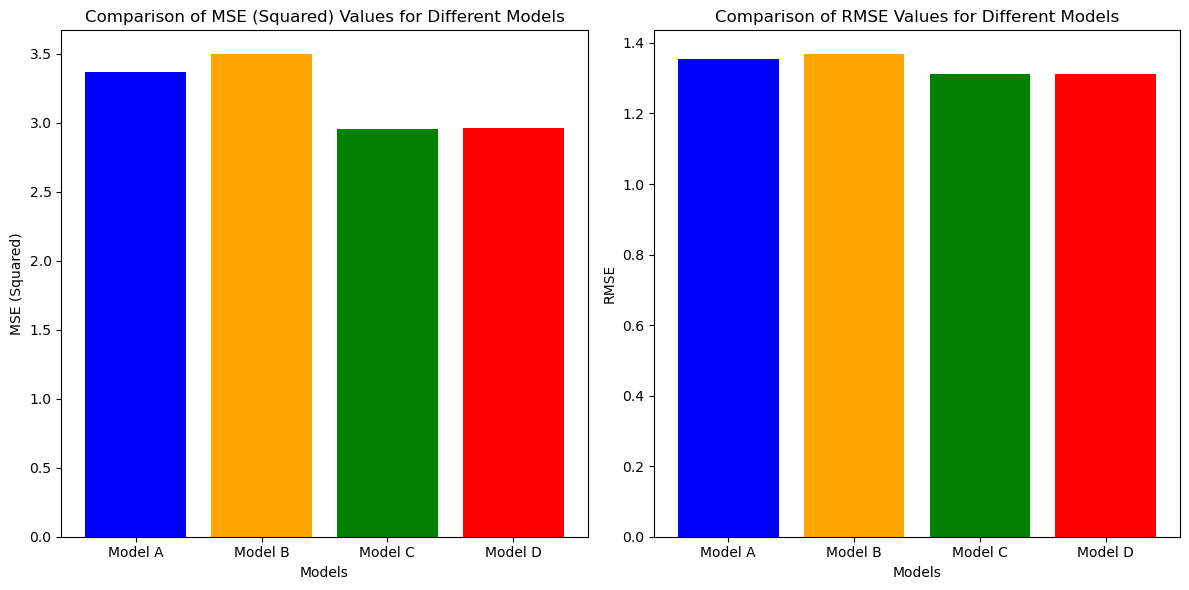

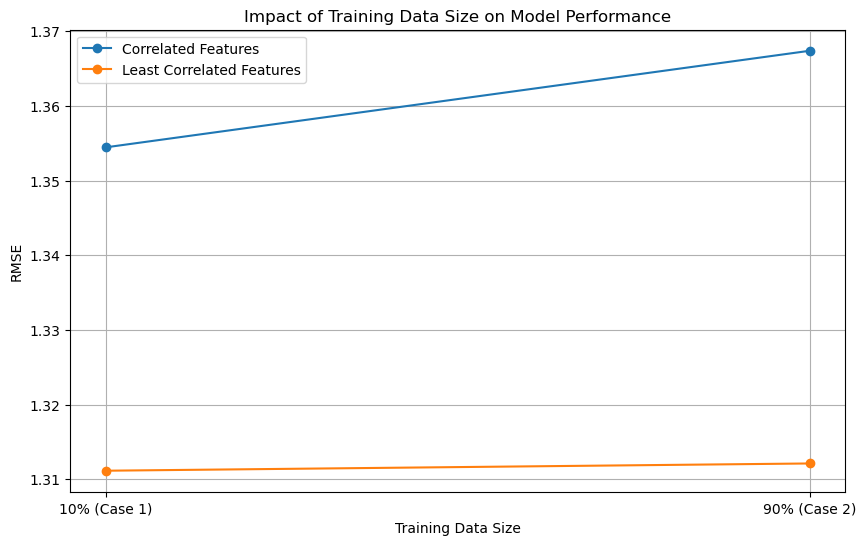

In [59]:
models = ['Model A', 'Model B', 'Model C', 'Model D']
mse_values = [1.8345515207639367, 1.8697898442987213, 1.7190979760291663, 1.7216496666271401]
rmse_values = [1.354456171592103, 1.3674025904241667, 1.3111437663464545, 1.3121164836351764]

# Calculate squared MSE values for bar plot
mse_squared_values = [mse ** 2 for mse in mse_values]

# Plot 1: Side-by-Side Bar Plot for MSE and RMSE Comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(models, mse_squared_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('MSE (Squared)')
plt.title('Comparison of MSE (Squared) Values for Different Models')

plt.subplot(1, 2, 2)
plt.bar(models, rmse_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE Values for Different Models')

plt.tight_layout()
plt.show()

# Plot 2: Line Plot to Visualize Model Performance Trend with Increasing Training Data Size
training_data_sizes = ['10% (Case 1)', '90% (Case 2)']
rmse_values_case_1 = [1.354456171592103, 1.3674025904241667]
rmse_values_case_2 = [1.3111437663464545, 1.3121164836351764]

plt.figure(figsize=(10, 6))
plt.plot(training_data_sizes, rmse_values_case_1, marker='o', label='Correlated Features')
plt.plot(training_data_sizes, rmse_values_case_2, marker='o', label='Least Correlated Features')
plt.xlabel('Training Data Size')
plt.ylabel('RMSE')
plt.title('Impact of Training Data Size on Model Performance')
plt.legend()
plt.grid()
plt.show()